Name: Mithun Kumar
Register Number: 212224230160
Neural Network Regression Model Initialized
Name: Mithun Kumar
Register Number: 212224230160
Epoch [0/2000], Loss: 381.888031
Epoch [200/2000], Loss: 4.873631
Epoch [400/2000], Loss: 0.008927
Epoch [600/2000], Loss: 0.000000
Epoch [800/2000], Loss: 0.000000
Epoch [1000/2000], Loss: 0.000000
Epoch [1200/2000], Loss: 0.000000
Epoch [1400/2000], Loss: 0.000000
Epoch [1600/2000], Loss: 0.000000
Epoch [1800/2000], Loss: 0.000000
Name: Mithun Kumar
Register Number: 212224230160
Test Loss: 0.664830


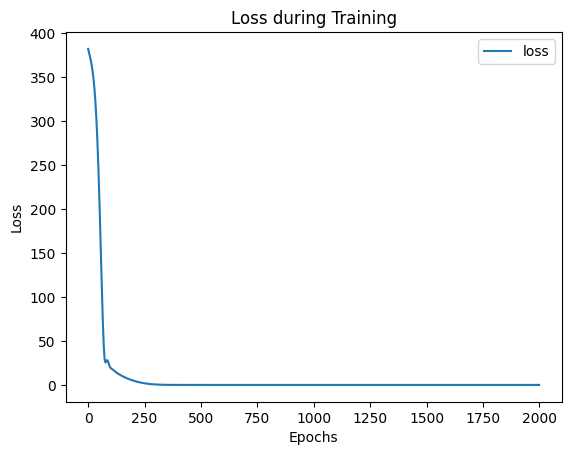

Name: Mithun Kumar
Register Number: 212224230160
Prediction for input 9: 21.0


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

def mithunkumar():
    print("Name: Mithun Kumar")
    print("Register Number: 212224230160")

dataset1 = pd.read_csv('MyMLData.csv')

X = dataset1[['Input']].values
y = dataset1[['Output']].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=33
)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1,1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1,1)

class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 6)
        self.fc3 = nn.Linear(6, 1)
        self.relu = nn.ReLU()
        self.history = {'loss': []}
        mithunkumar()
        print("Neural Network Regression Model Initialized")

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

ai_brain = NeuralNet()

criterion = nn.MSELoss()
optimizer = optim.Adam(ai_brain.parameters(), lr=0.01)

def train_model(ai_brain, X_train, y_train, criterion, optimizer, epochs=2000):
    mithunkumar()
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = ai_brain(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        ai_brain.history['loss'].append(loss.item())
        if epoch % 200 == 0:
            print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')

train_model(ai_brain, X_train_tensor, y_train_tensor, criterion, optimizer)

with torch.no_grad():
    mithunkumar()
    test_loss = criterion(ai_brain(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')

loss_df = pd.DataFrame(ai_brain.history)

loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

X_n1_1 = torch.tensor([[9]], dtype=torch.float32)
prediction = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()

mithunkumar()
print(f'Prediction for input 9: {prediction}')
